                location parameter  value        date   unit  \
0     Beijing US Embassy      pm25     44  2023-01-31  µg/m³   
1     Beijing US Embassy      pm25     40  2023-01-30  µg/m³   
2     Beijing US Embassy      pm25     45  2023-01-30  µg/m³   
3     Beijing US Embassy      pm25     50  2023-01-30  µg/m³   
4     Beijing US Embassy      pm25     55  2023-01-30  µg/m³   
...                  ...       ...    ...         ...    ...   
8748  Beijing US Embassy      pm25     60  2022-01-01  µg/m³   
8749  Beijing US Embassy      pm25     37  2022-01-01  µg/m³   
8750  Beijing US Embassy      pm25     40  2022-01-01  µg/m³   
8751  Beijing US Embassy      pm25     35  2022-01-01  µg/m³   
8752  Beijing US Embassy      pm25     44  2022-01-01  µg/m³   

                                   coordinates country     city  latitude  \
0     {'latitude': 39.95, 'longitude': 116.47}      CN  Beijing     39.95   
1     {'latitude': 39.95, 'longitude': 116.47}      CN  Beijing     39.95   


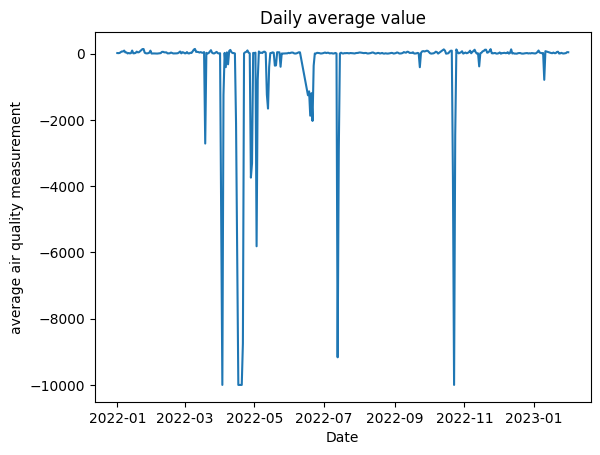

In [3]:
#!/usr/bin/env python
# coding: utf-8

# # Importing Libraries

# In[60]:


import pandas as pd
import requests
import json
import matplotlib.pyplot as plt


# In[49]:



# Set the OpenAQ API endpoint and parameters
endpoint = 'https://api.openaq.org/v1/measurements'
city = 'Beijing'
parameter = 'pm25'
date_from = '2022-01-01'
date_to = '2023-01-31'

# Set the query parameters for the API request
params = {
    'city': city,
    'parameter': parameter,
    'date_from': date_from,
    'date_to': date_to,
    'limit': 10000 # maximum number of results per request
}

# Send the API request and retrieve the response
response = requests.get(endpoint, params=params)

# Extract the measurement data from the response JSON
measurements = response.json()['results']

# Convert the measurement data to a Pandas DataFrame
df = pd.DataFrame(measurements)


# In[50]:


df


# # Formatting of Coordinated column

# In[57]:


df['latitude'] = df['coordinates'].apply(lambda x: x['latitude'])
df['longitude'] = df['coordinates'].apply(lambda x: x['longitude'])


# In[58]:


df


# # Date Extraction from datetime

# In[51]:


import pandas as pd
import datetime
df['datetime'] = pd.to_datetime(df['date'].apply(lambda x: x['utc']))

# Extract date component and store in new column
df['date'] = df['datetime'].dt.date

print(df)


# In[52]:


df


# # Missing data Checking

# In[53]:


null_data = df[df.isnull().any(axis=1)]


# In[54]:


null_data


# In[55]:


df['date'] = pd.to_datetime(df['date'])


# # Average air quality measurement for each day

# In[56]:


grouped = df.groupby('date').agg({
    'value': 'mean'
})

# Reset index to get date as a separate column
grouped = grouped.reset_index()

# Print resulting dataframe
print(grouped)


# In[59]:


a=grouped.loc[:,"value"]


# # Visualization of Average Air Quality

# In[70]:


plt.plot(grouped['date'], grouped['value'])
plt.xlabel('Date')
plt.ylabel('average air quality measurement')
plt.title('Daily average value')

plt.show()


# In[ ]:






[[376]]
Predicted air quality measurement for the next day: -260.776608766682


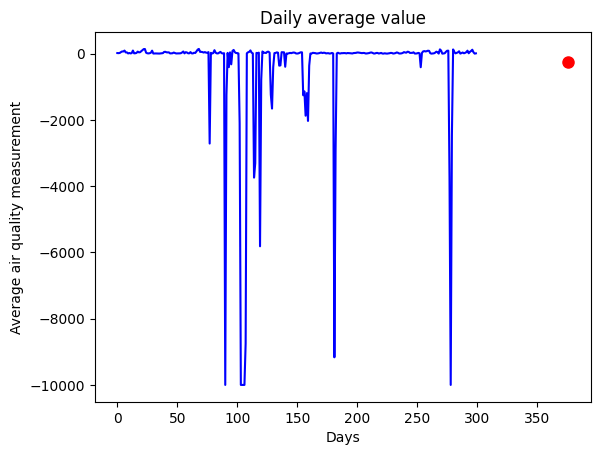

In [7]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set the OpenAQ API endpoint and parameters
endpoint = 'https://api.openaq.org/v1/measurements'
city = 'Beijing'
parameter = 'pm25'
date_from = '2022-01-01'
date_to = '2023-01-31'

# Set the query parameters for the API request
params = {
    'city': city,
    'parameter': parameter,
    'date_from': date_from,
    'date_to': date_to,
    'limit': 10000 # maximum number of results per request
}

# Send the API request and retrieve the response
response = requests.get(endpoint, params=params)

# Extract the measurement data from the response JSON
measurements = response.json()['results']

# Convert the measurement data to a Pandas DataFrame
df = pd.DataFrame(measurements)

# Formatting of Coordinated column
df['latitude'] = df['coordinates'].apply(lambda x: x['latitude'])
df['longitude'] = df['coordinates'].apply(lambda x: x['longitude'])

# Date Extraction from datetime
df['datetime'] = pd.to_datetime(df['date'].apply(lambda x: x['utc']))
df['date'] = df['datetime'].dt.date

# Average air quality measurement for each day
grouped = df.groupby('date').agg({
    'value': 'mean'
}).reset_index()

# Convert the date column to datetime format
grouped['date'] = pd.to_datetime(grouped['date'])

# Split the dataset into train and test sets
train_size = int(len(grouped) * 0.8)
train_set = grouped[:train_size]
test_set = grouped[train_size:]

# Train the linear regression model on the training set
regressor = LinearRegression()
regressor.fit(train_set.index.values.reshape(-1, 1), train_set['value'])

# Predict the air quality measurement for the next day
next_day_index = [[len(grouped) + 1]]
print(next_day_index)
next_day_prediction = regressor.predict(next_day_index)

# Print the predicted value
print("Predicted air quality measurement for the next day:", next_day_prediction[0])

# Plot the training set and the predicted value
plt.plot(train_set.index, train_set['value'], color='blue')
plt.plot(len(grouped) + 1, next_day_prediction[0], marker='o', markersize=8, color='red')
plt.xlabel('Days')
plt.ylabel('Average air quality measurement')
plt.title('Daily average value')
plt.show()


In [ ]:
import pickle

pickle.dump(regressor, open('model.pkl','wb'))